In [248]:
import pandas as pd
loans_2007=pd.read_csv("/Users/praga/Downloads/loans_2007.csv")
loans_2007.head(9)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
6,1069639,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
7,1072053,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
8,1071795,1306957.0,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [249]:
loans_2007.shape

(42538, 52)

# Data Cleaning

The Dataframe contains many columns and can be cumbersome to try to explore all at once. Let's break up the columns into 3 groups of 18 columns.

### Group 1

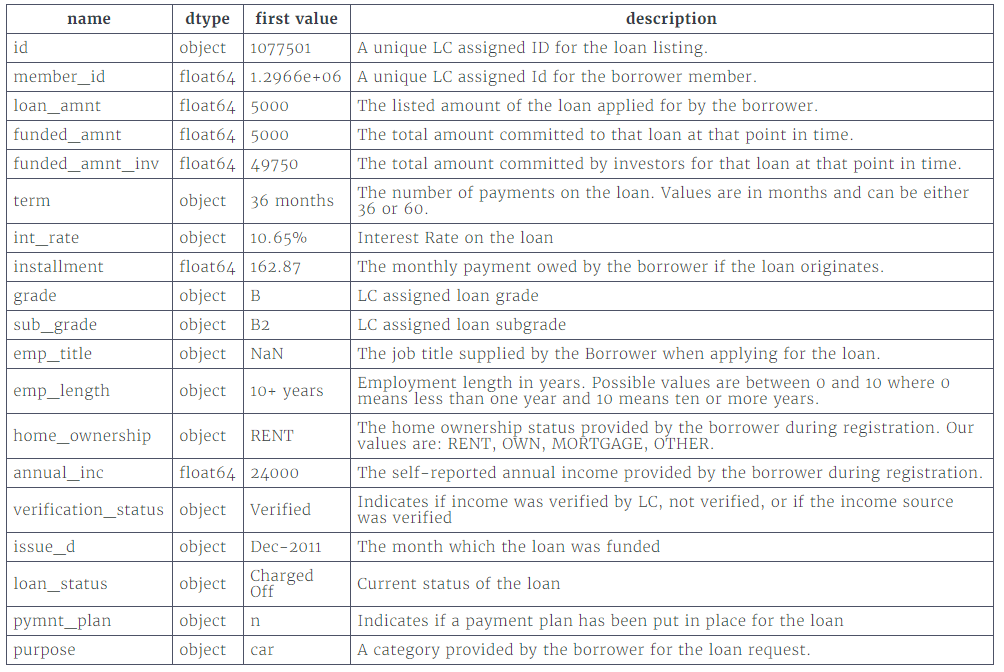

In [250]:
loans_2007 = loans_2007.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)

In [251]:
loans_2007.head(1)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [252]:
loans_2007.shape

(42538, 44)

We need to drop columns that leak data from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

### Group 2

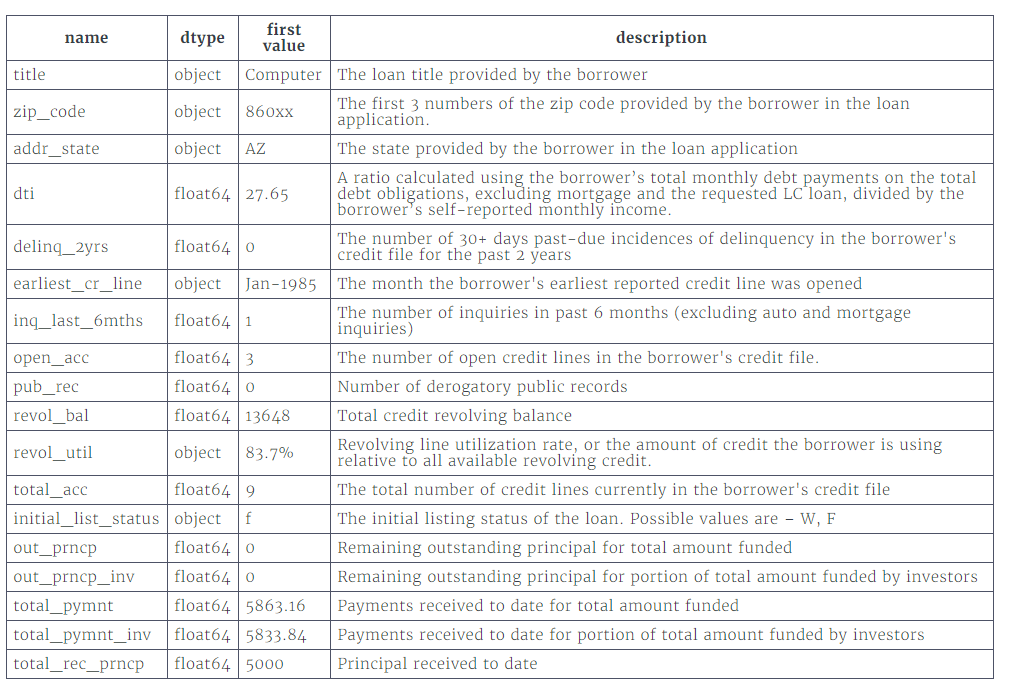

In [253]:
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

In [254]:
loans_2007.shape

(42538, 38)

### Group 3

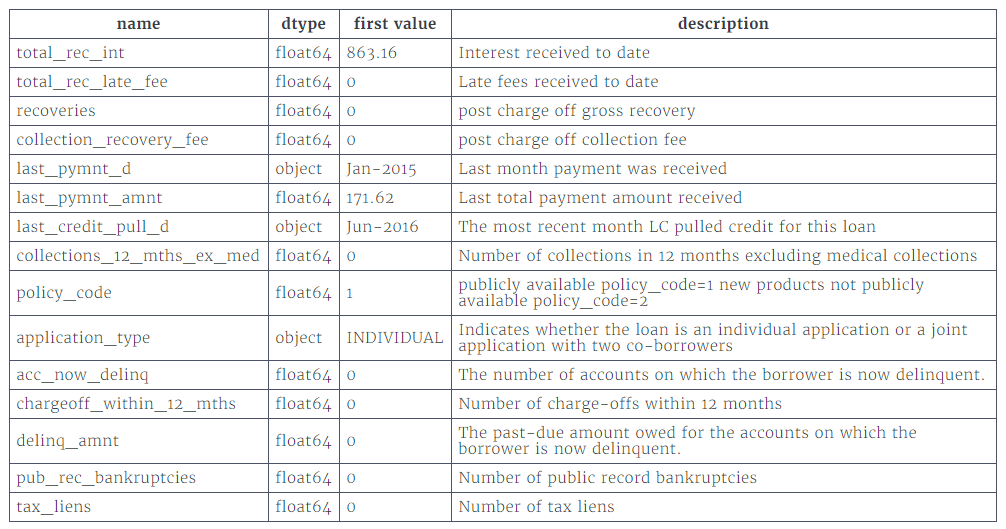

In [255]:
loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)

print(loans_2007.shape)

(42538, 32)


We use the loan_status column as the target variable, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. Currently, this column contains text values and we need to convert it to a numerical one for training a model. 

In [256]:
loans_2007['loan_status'].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

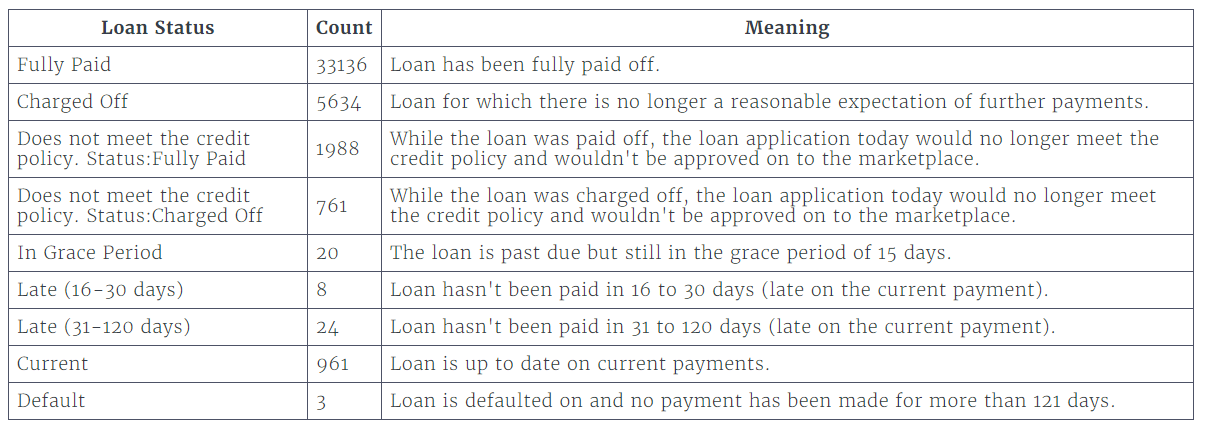

In [257]:
loans_2007['loan_status'].describe()

count          42535
unique             9
top       Fully Paid
freq           33136
Name: loan_status, dtype: object

Its of the object data type. We have to convert it into numeric type.

From the investor's perspective, we're interested in trying to predict which loans will be paid off on time and which ones won't be. Only the Fully Paid and Charged Off values describe the final outcome of the loan. The other values describe loans that are still on going and where the jury is still out on if the borrower will pay back the loan on time or not.

Since we're interested in being able to predict which of these 2 values a loan will fall under, this problem becomes a binary classification one.

In [258]:
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0
    }
}

loans_2007 = loans_2007.replace(status_replace)
loans_2007['loan_status'].value_counts()

1    33136
0     5634
Name: loan_status, dtype: int64

Now the dataframe consists of records containing Loan_status as either "Fully Paid" or "Charged Off". We have replaced Fully Paid values to 1 for the positive case and the Charged Off values to 0 for the negative case. 

We shall look for any columns that contain only one unique value and remove them too. 

In [259]:
orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)


In [260]:
loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [261]:
loans_2007.shape

(38770, 23)

# Feature Preparation

In [262]:
null_counts = loans_2007.isnull().sum()
print(null_counts[null_counts>0])

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [263]:
loans_2007 = loans_2007.drop(["pub_rec_bankruptcies", "emp_length"], axis=1)
loans_2007 = loans_2007.dropna(axis=0)
print(loans_2007.dtypes.value_counts())

float64    10
object     10
int64       1
dtype: int64


The object columns that contain text need to be converted to numerical data types. 

In [264]:
object_df= loans_2007.select_dtypes(include=['object'])
object_df.head()

,term,int_rate,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,10.65%,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Jun-2016
1,60 months,15.27%,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Sep-2013
2,36 months,15.96%,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Jun-2016
3,36 months,13.49%,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016
5,36 months,7.90%,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-2004,28.3%,Jan-2016


There are columns that have numerical values that need to be converted into numeric type.

In [265]:
object_df['term'].value_counts()

 36 months    29040
 60 months     9667
Name: term, dtype: int64

In [266]:
object_df['home_ownership'].value_counts()

RENT        18513
MORTGAGE    17111
OWN          2984
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [267]:
object_df['verification_status'].value_counts()

Not Verified       16696
Verified           12289
Source Verified     9722
Name: verification_status, dtype: int64

In [268]:
object_df['purpose'].value_counts()

debt_consolidation    18130
credit_card            5039
other                  3864
home_improvement       2897
major_purchase         2154
small_business         1762
car                    1510
wedding                 929
medical                 680
moving                  576
vacation                375
house                   369
educational             320
renewable_energy        102
Name: purpose, dtype: int64

In [269]:
loans_2007= loans_2007.drop(['earliest_cr_line','last_credit_pull_d','title','addr_state'], axis=1)

In [270]:
loans_2007["int_rate"] = loans_2007["int_rate"].str.rstrip("%").astype("float")
loans_2007["revol_util"] = loans_2007["revol_util"].str.rstrip("%").astype("float")

In [271]:
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans_2007[cat_columns])

In [272]:
loans_2007 = pd.concat([loans_2007, dummy_df], axis=1)
loans_2007 = loans_2007.drop(cat_columns, axis=1)
loans_2007.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,1,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,30000.0,0,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,12252.0,1,8.72,0.0,2.0,2.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,49200.0,1,20.00,0.0,1.0,10.0,0.0,...,0,0,0,1,0,0,0,0,1,0
5,5000.0,7.90,156.46,36000.0,1,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,0,0,0,1,1,0


# Making Predicitions

The algorithm will make predictions about whether or not a loan will be paid off on time, which is contained in the loan_status column of the clean dataset.

In the loan_status and prediction columns, a 0 means that the loan wouldn't be paid off on time, and a 1 means that it would.

In [274]:
loans_2007.shape

(38707, 37)

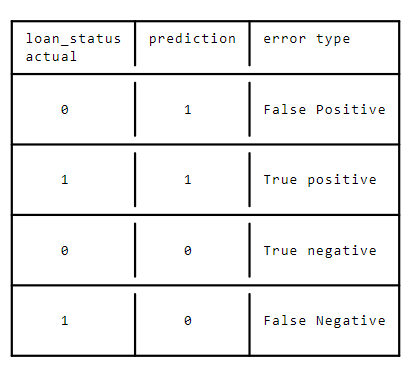

 A conservative investor would want to minimize risk, and avoid false positives as much as possible. They'd be more okay with missing out on opportunities (false negatives) than they would be with funding a risky loan (false positives).

In [276]:
loans_2007['loan_status'].value_counts()

1    33092
0     5615
Name: loan_status, dtype: int64

 There are 6 times as many loans that were paid off on time (1), than loans that weren't paid off on time (0). This causes a major issue when we use accuracy as a metric. This is because due to the class imbalance, a classifier can predict 1 for every row, and still have high accuracy. 

## Logistic Regression

In [298]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
features=loans_2007.columns.drop('loan_status')
train=loans_2007[features]
lr.fit(train,loans_2007['loan_status'])
predictions=lr.predict(train)

In [299]:
# False positives.
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])
print("False Positive: ")
print(fp)

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])
print("True Positive: ")
print(tp)
# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])
print("False Negative: ")
print(fn)
# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
print("True Negative: ")
print(tn)
tpr = tp / float(tp + fn)
fpr = fp / float(fp + tn)

print("True Positive Rate :")
print(float(tpr))
print("False Positive Rate: ")
print(float(fpr))

False Positive: 
5597
True Positive: 
33047
False Negative: 
45
True Negative: 
18
True Positive Rate :
0.99864015472
False Positive Rate: 
0.99679430098


In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression()
predictions = cross_val_predict(lr, train, loans_2007['loan_status'], cv=5)


In [301]:
# False positives.
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])
print("False Positive: ")
print(fp)

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])
print("True Positive: ")
print(tp)
# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])
print("False Negative: ")
print(fn)
# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
print("True Negative: ")
print(tn)
tpr = tp / float(tp + fn)
fpr = fp / float(fp + tn)

print("True Positive Rate :")
print(float(tpr))
print("False Positive Rate: ")
print(float(fpr))

False Positive: 
5599
True Positive: 
33051
False Negative: 
41
True Negative: 
16
True Positive Rate :
0.998761029856
False Positive Rate: 
0.99715048976


The classifier  isn't accounting for the imbalance in the classes.

In [312]:
import numpy as np
predictions=np.asarray(predictions)
np.unique(predictions,return_counts=True)

(array([0, 1], dtype=int64), array([   57, 38650], dtype=int64))

In [318]:
loans_2007['loan_status'].head(10)

0     1
1     0
2     1
3     1
5     1
6     1
7     1
8     0
9     0
10    1
Name: loan_status, dtype: int64

In [319]:
predictions[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

 To prevent imbalance in classes prediction, we make classifier to penalize misclassifications of the less prevalent class more than the other class.

In [320]:
lr = LogisticRegression(class_weight="balanced")
predictions = cross_val_predict(lr, train, loans_2007['loan_status'], cv=5)


In [321]:
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])
print("False Positive: ")
print(fp)

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])
print("True Positive: ")
print(tp)
# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])
print("False Negative: ")
print(fn)
# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
print("True Negative: ")
print(tn)
tpr = tp / float(tp + fn)
fpr = fp / float(fp + tn)

print("True Positive Rate :")
print(float(tpr))
print("False Positive Rate: ")
print(float(fpr))

False Positive: 
2201
True Positive: 
22166
False Negative: 
10926
True Negative: 
3414
True Positive Rate :
0.669829566058
False Positive Rate: 
0.391985752449


In [322]:
penalty = {
    0: 10,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
predictions = cross_val_predict(lr, train, loans_2007['loan_status'], cv=5)
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])
print("False Positive: ")
print(fp)

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])
print("True Positive: ")
print(tp)
# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])
print("False Negative: ")
print(fn)
# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
print("True Negative: ")
print(tn)
tpr = tp / float(tp + fn)
fpr = fp / float(fp + tn)

print("True Positive Rate :")
print(float(tpr))
print("False Positive Rate: ")
print(float(fpr))

False Positive: 
483
True Positive: 
7651
False Negative: 
25441
True Negative: 
5132
True Positive Rate :
0.231203916354
False Positive Rate: 
0.0860195903829


In [329]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
precision_recall_fscore_support(loans_2007['loan_status'], predictions, average='macro')

(0.5542400759379951, 0.5725921629857514, 0.32740173192050515, None)

In [330]:
from sklearn.metrics import classification_report
print(classification_report(loans_2007['loan_status'], predictions))

             precision    recall  f1-score   support

          0       0.17      0.91      0.28      5615
          1       0.94      0.23      0.37     33092

avg / total       0.83      0.33      0.36     38707



# Random Forest Classifier

In [344]:
from sklearn.ensemble import RandomForestClassifier
penalty = {
    0: 100,
    1: 0.1
}
rf = RandomForestClassifier(class_weight=penalty, random_state=1,n_estimators=10,min_samples_split=10)
predictions = cross_val_predict(rf, train, loans_2007['loan_status'], cv=5)
fp_filter = (predictions == 1) & (loans_2007["loan_status"] == 0)
fp = len(predictions[fp_filter])
print("False Positive: ")
print(fp)

# True positives.
tp_filter = (predictions == 1) & (loans_2007["loan_status"] == 1)
tp = len(predictions[tp_filter])
print("True Positive: ")
print(tp)
# False negatives.
fn_filter = (predictions == 0) & (loans_2007["loan_status"] == 1)
fn = len(predictions[fn_filter])
print("False Negative: ")
print(fn)
# True negatives
tn_filter = (predictions == 0) & (loans_2007["loan_status"] == 0)
tn = len(predictions[tn_filter])
print("True Negative: ")
print(tn)
tpr = tp / float(tp + fn)
fpr = fp / float(fp + tn)

print("True Positive Rate :")
print(float(tpr))
print("False Positive Rate: ")
print(float(fpr))

False Positive: 
4828
True Positive: 
30828
False Negative: 
2264
True Negative: 
787
True Positive Rate :
0.931584673033
False Positive Rate: 
0.859839715049


In [345]:
print(classification_report(loans_2007['loan_status'], predictions))

             precision    recall  f1-score   support

          0       0.26      0.14      0.18      5615
          1       0.86      0.93      0.90     33092

avg / total       0.78      0.82      0.79     38707



The logistic regression model performed better compared to the random forests classifier.